In [1]:
import numpy as np
import os
from invivoinfer.vc_infer_trace import VCAnalysis
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import imp
import logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from IPython.display import clear_output

Couldn't import dot_parser, loading of dot files will not be possible.


# Loading the trace

In [2]:
DATA_DIR = os.path.join('/'.join(imp.find_module("invivoinfer")[1].split('/')[:-1]), 'data')
TEST_DATA_PATH = os.path.join(DATA_DIR, 'test_trace.csv')
FIGURES_DIR = os.path.join('/'.join(imp.find_module("invivoinfer")[1].split('/')[:-1]), 'notebooks', 'figures')

trace = np.genfromtxt(TEST_DATA_PATH, delimiter=',')
dt = 0.0001

In [3]:
# FOR A FASTER TESTING USE 'config_testing.json'
vcanalysis = VCAnalysis(trace, dt, figures_folder=FIGURES_DIR, config='config.json')

INFO:root:Trace length: 10.2237 sec
INFO:root:We flip the trace to be positive, negative trace detected.


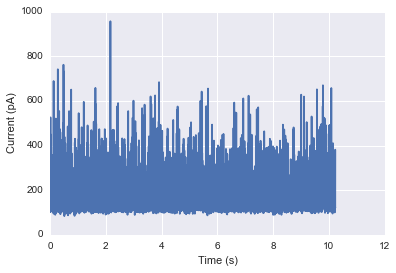

In [4]:
dt_trace = np.arange(0, dt*(len(trace)), dt)
plt.plot(dt_trace, vcanalysis.raw_trace)
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

In [5]:
vcanalysis.run_analysis(save_pdf=True, distType='LogNormal')
clear_output()

# baseline subtraction

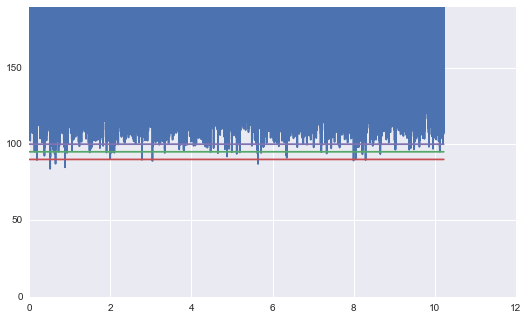

In [6]:
vcanalysis.plot_mean_offset(save_pdf=True)

# Powerspectrum Fit to get time constants - and low frequency correction

/Users/paolopuggioni/virtualenvironment/py_1/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


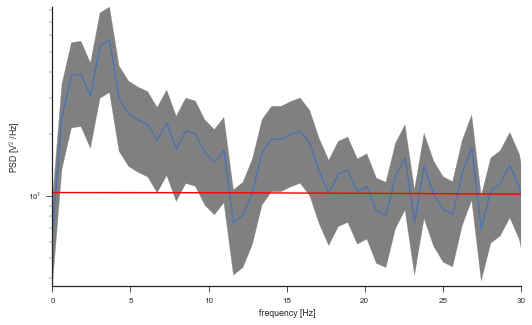

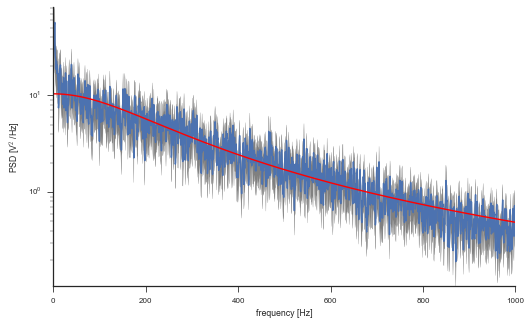

In [7]:
vcanalysis.plot_tau_estimation(save_pdf=True)

In [8]:
tau1 = vcanalysis.param_priors['tau1'][0]
tau2 = vcanalysis.param_priors['tau2'][0]
print 'Tau1 = {} sec, Tau2 = {} msec'.format(tau1*1000, tau2*1000)

Tau1 = 7.63593652613e-05 sec, Tau2 = 0.718633914978 msec


# Map Results

Map weights and frequency

In [9]:
vcanalysis.inference_results['map']['weights'].squeeze()

A         64.727896
stdA      58.874846
freq    1326.418130
Name: 48, dtype: float64

In [10]:
vcanalysis.inference_results['map']['metrics']

{'aic': 26.918003951815617, 'bic': 22.622064479654853}

# MCMC results

Posterior distribution of A, stdA and frequency, summary:

In [11]:
vcanalysis.inference_results['mh']['weights'].describe()

,A,stdA,freq
count,2000.000000,2000.000000,2000.000000
mean,65.465157,54.213810,1458.694777
std,15.618751,7.310697,393.198510
min,36.302509,11.041378,535.812451
25%,54.761998,50.931254,1171.125926
50%,61.939383,54.510533,1446.408341
75%,73.059336,58.496313,1713.989609
max,141.470821,78.423618,2948.160083


In [12]:
vcanalysis.inference_results['mh']['dic']

35.447256578884968

# Posterior distribution of A, stdA an frequency

INFO:root:START PLOTTING FIGURES
/Users/paolopuggioni/virtualenvironment/py_1/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/paolopuggioni/virtualenvironment/py_1/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


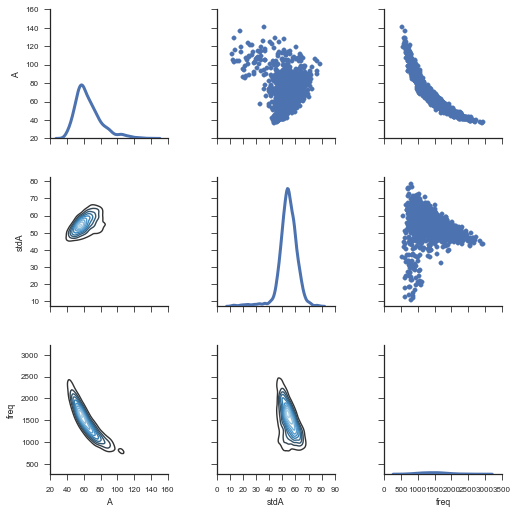

In [13]:
vcanalysis.plot_mc_results()

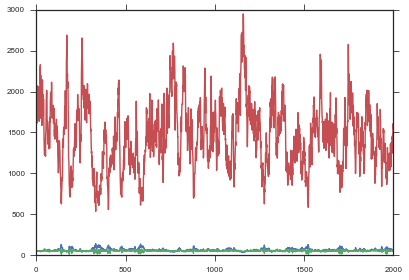

In [17]:
for el in ['A', 'stdA', 'freq']:
    vcanalysis.inference_results['mh']['weights'][el].plot()